# Analysing Baby Names

In this tutorial, we will use pandas to analyse patterns over time in US baby names.
This is meant as inspiration by showcasing the kind of analyses we can do with pandas. 
Don't worry if it seems quite magical at first, we will be going over these commands more slowly in the next weeks. 

Before we start work, first import the necessary names and set matplotlib to put plots inline:

In [1]:
import pandas as pd
%matplotlib inline  

Get the data from ssa.gov if the 'data' folder does not exist:
(note: this won't work on Windows, you will have to manually download the zip and extract to a folder called 'data')

In [2]:
import os.path
if not os.path.exists("data"): 
    url = "https://www.ssa.gov/oact/babynames/names.zip"
    print(url)
    !wget {url} && mkdir data && unzip names.zip -d data && rm names.zip

Let's have a look at one of the files. We can use the ipython !cat command (on windows), and/or read the file into a pandas 'DataFrame':

In [3]:
!head data/yob2015.txt

In [4]:
names = pd.read_csv("data/yob2015.txt", names=['name', 'gender', 'n'])
names.head(5)

,name,gender,n
0,Emma,F,20355
1,Olivia,F,19553
2,Sophia,F,17327
3,Ava,F,16286
4,Isabella,F,15504


To get the most popular boy's names, select on gender and sort by n:

In [5]:
boys = names[names.gender == "M"]
boys = boys.sort_values("n", ascending=False)
boys.head(5)

,name,gender,n
18993,Noah,M,19511
18994,Liam,M,18281
18995,Mason,M,16535
18996,Jacob,M,15816
18997,William,M,15809


Let's calculate the total number of boys and girls:

In [6]:
names.groupby('gender')['n'].sum()

gender
F    1769325
M    1898858
Name: n, dtype: int64

We can also ask how often specific names have been used:

In [7]:
mynames = ("John", "Juan", "Mary", "Maria")
names[(names.name.isin(mynames)) & (names.n > 100)]

,name,gender,n
108,Maria,F,2803
123,Mary,F,2602
19018,John,M,10303
19106,Juan,M,3510


# Combining data from all years
So far, we've looked at the 2015 data. But we've downloaded all data from 1880! To make it easier to analyse all data, let's create a data frame containing all data:

In [8]:
years = []
for year in range(1880, 2016):
    fn = "data/yob{year}.txt".format(year=year)
    d = pd.read_csv(fn, names=["name", "gender", "n"])
    d['year'] = year
    years.append(d)
    
names = pd.concat(years, ignore_index=True)
names.head(5)

,name,gender,n,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


Let's now plot the total number of births per year per gender:

In [9]:
total = names.pivot_table("n", index="year", columns="gender", aggfunc="sum")
total.head()

gender,F,M
year,,
1880,90992,110490
1881,91953,100743
1882,107848,113686
1883,112318,104627
1884,129020,114443


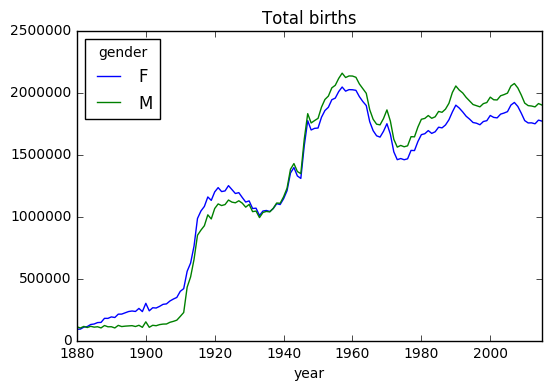

In [10]:
total.plot(title='Total births');

# Naming trends

Now, let's have a look at some trends, for example the popularity of 'English' and 'Latino' first names.
First, let's plot how often these names have been used over time:

In [11]:
subset = names[names.name.isin(mynames)]
subset.head()

,name,gender,n,year
0,Mary,F,7065,1880
130,Maria,F,125,1880
228,John,F,46,1880
942,John,M,9655,1880
1213,Juan,M,39,1880


In [12]:
counts = subset.pivot_table("n", "year", "name")
counts.head()

name,John,Juan,Maria,Mary
year,,,,
1880,4850.5,39.0,125.0,3546.0
1881,4397.5,45.0,120.0,3474.0
1882,4798.5,39.0,121.0,4089.0
1883,4467.0,50.0,141.0,4022.0
1884,4714.0,56.0,190.0,4626.5


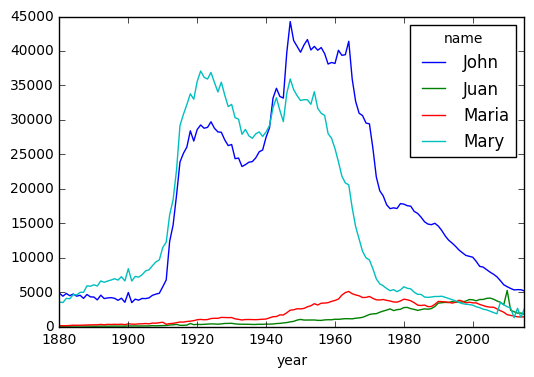

In [13]:
counts.plot()

It's interesting to see that John and Mary both became a lot less popular after the 1960's, while Juan and Maria became more popular, even though Maria seems have peaked in the early 1960's as well*

*) perhaps coincidental with the 1961 release of West Side story - see https://www.youtube.com/watch?v=VpdB6CN7jww for some nostalgia :)

Let's now compute the ratio of 'Hispanic names' to 'English names':

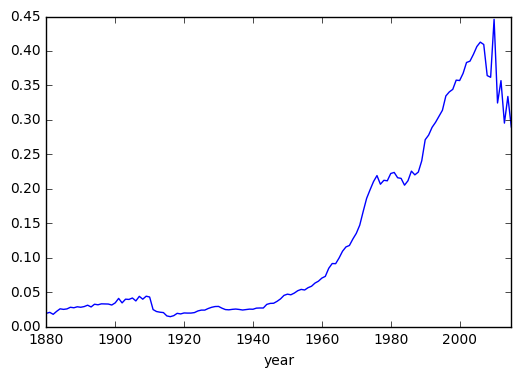

In [14]:
total = counts.sum(axis=1)
hispanic_names = ["Juan", "Maria"]
hispanic = counts[hispanic_names].sum(axis=1)
counts['ratio'] = hispanic / total
counts['ratio'].plot()

So as you can see the ratio did indeed increase steeply from the 1960's, although it is behaving more erratically in recent years. 

This is only a brief overview of the kind of things you can do (and do quite easily) with pandas. Look through chapters 2 and 5 of 'Python for Data Analysis' for more examples and information!